Ayush Makade

BE CMPN A 21102A0052

github link: https://github.com/AyushMakade/Machine-Learning

In [5]:
!pip install xgboost

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier, XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')


In [7]:
# Load the Breast Cancer Wisconsin dataset
classification_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
classification_data = pd.read_csv(classification_url, header=None, names=columns)

# Convert Diagnosis to binary
classification_data['Diagnosis'] = classification_data['Diagnosis'].map({'M': 1, 'B': 0})

# Drop ID column
classification_data.drop(['ID'], axis=1, inplace=True)

# Split the dataset into features and target variable
X_class = classification_data.drop('Diagnosis', axis=1)
y_class = classification_data['Diagnosis']

# Split into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


In [8]:
# Construct and train the XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = xgb_classifier.predict(X_test_class)
y_pred_prob_class = xgb_classifier.predict_proba(X_test_class)[:, 1]

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
roc_auc = roc_auc_score(y_test_class, y_pred_prob_class)

print(f"Classification Performance Metrics:\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-score: {f1:.2f}\nROC AUC: {roc_auc:.2f}")


Classification Performance Metrics:
Accuracy: 0.96
Precision: 0.95
Recall: 0.93
F1-score: 0.94
ROC AUC: 0.99


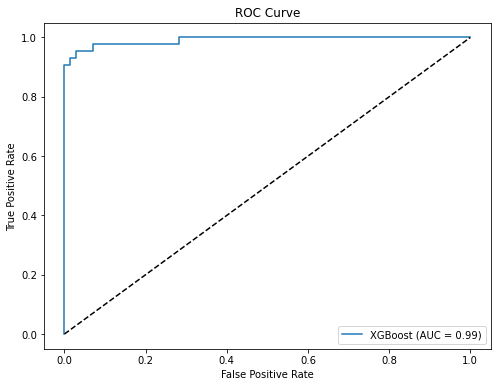

In [9]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test_class, y_pred_prob_class)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [10]:
# Load the California Housing dataset
regression_url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
regression_data = pd.read_csv(regression_url)

# Handle missing values if any
regression_data.dropna(inplace=True)

# Define features and target variable
X_reg = regression_data.drop('median_house_value', axis=1)
y_reg = regression_data['median_house_value']

# Convert categorical feature 'ocean_proximity' to numeric
X_reg = pd.get_dummies(X_reg, drop_first=True)

# Split into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [11]:
# Construct and train the XGBoost regressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train_reg, y_train_reg)

# Predict on the test set
y_pred_reg = xgb_regressor.predict(X_test_reg)

# Evaluate the regressor's performance
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Regression Performance Metrics:\nMean Squared Error (MSE): {mse:.2f}\nR-squared: {r2:.2f}")


Regression Performance Metrics:
Mean Squared Error (MSE): 2308108707.00
R-squared: 0.83


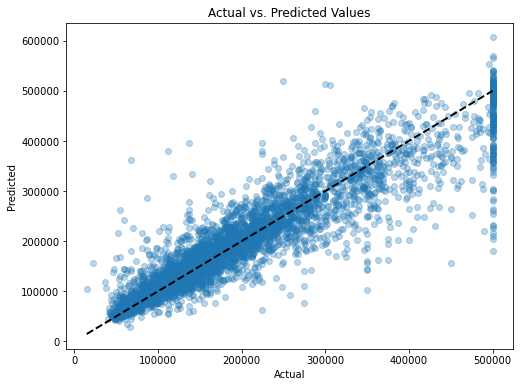

In [12]:
# Plot Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()


In [13]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class, y_train_class)
y_pred_rf_class = rf_classifier.predict(X_test_class)
y_pred_rf_prob_class = rf_classifier.predict_proba(X_test_class)[:, 1]

# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_regressor.predict(X_test_reg)


In [14]:
# Random Forest Classification Metrics
accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)
precision_rf = precision_score(y_test_class, y_pred_rf_class)
recall_rf = recall_score(y_test_class, y_pred_rf_class)
f1_rf = f1_score(y_test_class, y_pred_rf_class)
roc_auc_rf = roc_auc_score(y_test_class, y_pred_rf_prob_class)

print(f"Random Forest Classification Performance Metrics:\nAccuracy: {accuracy_rf:.2f}\nPrecision: {precision_rf:.2f}\nRecall: {recall_rf:.2f}\nF1-score: {f1_rf:.2f}\nROC AUC: {roc_auc_rf:.2f}")


Random Forest Classification Performance Metrics:
Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1-score: 0.95
ROC AUC: 1.00


In [15]:
# Random Forest Regression Metrics
mse_rf = mean_squared_error(y_test_reg, y_pred_rf_reg)
r2_rf = r2_score(y_test_reg, y_pred_rf_reg)

print(f"Random Forest Regression Performance Metrics:\nMean Squared Error (MSE): {mse_rf:.2f}\nR-squared: {r2_rf:.2f}")


Random Forest Regression Performance Metrics:
Mean Squared Error (MSE): 2378317289.57
R-squared: 0.83


In [16]:
# Create a dataframe for classification comparison
classification_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'XGBoost': [accuracy, precision, recall, f1, roc_auc],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
})

# Display the comparison dataframe
print("Classification Model Comparison:")
print(classification_comparison)


Classification Model Comparison:
      Metric   XGBoost  Random Forest
0   Accuracy  0.956140       0.964912
1  Precision  0.952381       0.975610
2     Recall  0.930233       0.930233
3   F1-score  0.941176       0.952381
4    ROC AUC  0.990829       0.995251


In [17]:
# Create a dataframe for regression comparison
regression_comparison = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'R-squared'],
    'XGBoost': [mse, r2],
    'Random Forest': [mse_rf, r2_rf]
})

# Display the comparison dataframe
print("Regression Model Comparison:")
print(regression_comparison)


Regression Model Comparison:
               Metric       XGBoost  Random Forest
0  Mean Squared Error  2.308109e+09   2.378317e+09
1           R-squared  8.312191e-01   8.260851e-01
